In [104]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error,root_mean_squared_error
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt
from sklearn.ensemble import StackingRegressor
from sklearn.svm import LinearSVR
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import RidgeCV, RANSACRegressor
from sklearn.svm import SVR
from sklearn import linear_model
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX


In [105]:
data = pd.read_csv("gas_consumption/Networked Gas Daily Consumption-2.csv")

In [106]:
data.head()

,STATISTIC,Statistic Label,TLIST(D1),Day,C04132V04898,Network Gas Customer Type,UNIT,VALUE
0,GNC01C01,Networked Gas Daily Consumption,2021M01D01,2021 January 01,20,Non-Daily Metered (annual consumption < 5.55 GWh),Gigawatt hours,61.593662
1,GNC01C01,Networked Gas Daily Consumption,2021M01D01,2021 January 01,30,Daily Metered (annual consumption >= 5.55 GWh ...,Gigawatt hours,7.816340
2,GNC01C01,Networked Gas Daily Consumption,2021M01D01,2021 January 01,40,Large Daily Metered (annual metered capacity >...,Gigawatt hours,9.972410
3,GNC01C01,Networked Gas Daily Consumption,2021M01D01,2021 January 01,10,Power Plants,Gigawatt hours,98.520732
4,GNC01C01,Networked Gas Daily Consumption,2021M01D01,2021 January 01,-,All networked gas customers,Gigawatt hours,177.903144


In [107]:
data["C04132V04898"].value_counts()

C04132V04898
20    1822
30    1822
40    1822
10    1822
-     1822
Name: count, dtype: int64

In [108]:
data["C04132V04898"].value_counts()

C04132V04898
20    1822
30    1822
40    1822
10    1822
-     1822
Name: count, dtype: int64

In [109]:
data["Network Gas Customer Type"].value_counts()

Network Gas Customer Type
Non-Daily Metered (annual consumption < 5.55 GWh)                1822
Daily Metered (annual consumption >= 5.55 GWh and < 57.5 GWh)    1822
Large Daily Metered (annual metered capacity >= 57.5 GWh)        1822
Power Plants                                                     1822
All networked gas customers                                      1822
Name: count, dtype: int64

In [110]:
len(data["C04132V04898"].unique())

5

In [111]:
len(data["Network Gas Customer Type"].unique())

5

In [112]:
data["STATISTIC"].value_counts()

STATISTIC
GNC01C01    4555
GNC01C02    4555
Name: count, dtype: int64

In [113]:
df = data[data["STATISTIC"]=="GNC01C01"]

In [114]:
df.UNIT.value_counts()

UNIT
Gigawatt hours    4555
Name: count, dtype: int64

In [115]:
df.drop(columns=["STATISTIC","TLIST(D1)","UNIT"],inplace=True)

C:\Users\OTS\AppData\Local\Temp\ipykernel_19288\1649989024.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=["STATISTIC","TLIST(D1)","UNIT"],inplace=True)


In [116]:
df.head()

,Statistic Label,Day,C04132V04898,Network Gas Customer Type,VALUE
0,Networked Gas Daily Consumption,2021 January 01,20,Non-Daily Metered (annual consumption < 5.55 GWh),61.593662
1,Networked Gas Daily Consumption,2021 January 01,30,Daily Metered (annual consumption >= 5.55 GWh ...,7.816340
2,Networked Gas Daily Consumption,2021 January 01,40,Large Daily Metered (annual metered capacity >...,9.972410
3,Networked Gas Daily Consumption,2021 January 01,10,Power Plants,98.520732
4,Networked Gas Daily Consumption,2021 January 01,-,All networked gas customers,177.903144


In [117]:
df.shape[0]/5

911.0

In [118]:
df.dtypes

Statistic Label               object
Day                           object
C04132V04898                  object
Network Gas Customer Type     object
VALUE                        float64
dtype: object

In [119]:
df['Date'] = pd.to_datetime(df['Day']).dt.date
df['Month'] = pd.to_datetime(df['Day']).dt.month
df['Year'] = pd.to_datetime(df['Day']).dt.year
df['day'] = pd.to_datetime(df['Day']).dt.day
df['day_of_week'] = pd.to_datetime(df['Day']).dt.day_name()
# df["Date"] = pd.to_datetime(df['Day'])

C:\Users\OTS\AppData\Local\Temp\ipykernel_19288\4271610399.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date'] = pd.to_datetime(df['Day']).dt.date
C:\Users\OTS\AppData\Local\Temp\ipykernel_19288\4271610399.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Month'] = pd.to_datetime(df['Day']).dt.month
C:\Users\OTS\AppData\Local\Temp\ipykernel_19288\4271610399.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexe

In [120]:
df["wom"]= df["day"].apply(lambda d: (d-1) // 7 + 1)

C:\Users\OTS\AppData\Local\Temp\ipykernel_19288\827107259.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["wom"]= df["day"].apply(lambda d: (d-1) // 7 + 1)


In [121]:
df.head()

,Statistic Label,Day,C04132V04898,Network Gas Customer Type,VALUE,Date,Month,Year,day,day_of_week,wom
0,Networked Gas Daily Consumption,2021 January 01,20,Non-Daily Metered (annual consumption < 5.55 GWh),61.593662,2021-01-01,1,2021,1,Friday,1
1,Networked Gas Daily Consumption,2021 January 01,30,Daily Metered (annual consumption >= 5.55 GWh ...,7.816340,2021-01-01,1,2021,1,Friday,1
2,Networked Gas Daily Consumption,2021 January 01,40,Large Daily Metered (annual metered capacity >...,9.972410,2021-01-01,1,2021,1,Friday,1
3,Networked Gas Daily Consumption,2021 January 01,10,Power Plants,98.520732,2021-01-01,1,2021,1,Friday,1
4,Networked Gas Daily Consumption,2021 January 01,-,All networked gas customers,177.903144,2021-01-01,1,2021,1,Friday,1


In [122]:
df.drop(columns="Day",inplace=True)

C:\Users\OTS\AppData\Local\Temp\ipykernel_19288\907279167.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns="Day",inplace=True)


In [123]:
df.head()

,Statistic Label,C04132V04898,Network Gas Customer Type,VALUE,Date,Month,Year,day,day_of_week,wom
0,Networked Gas Daily Consumption,20,Non-Daily Metered (annual consumption < 5.55 GWh),61.593662,2021-01-01,1,2021,1,Friday,1
1,Networked Gas Daily Consumption,30,Daily Metered (annual consumption >= 5.55 GWh ...,7.816340,2021-01-01,1,2021,1,Friday,1
2,Networked Gas Daily Consumption,40,Large Daily Metered (annual metered capacity >...,9.972410,2021-01-01,1,2021,1,Friday,1
3,Networked Gas Daily Consumption,10,Power Plants,98.520732,2021-01-01,1,2021,1,Friday,1
4,Networked Gas Daily Consumption,-,All networked gas customers,177.903144,2021-01-01,1,2021,1,Friday,1


In [124]:
df.Date.max()-df.Date.min() 

datetime.timedelta(days=910)

In [125]:
df.shape[0]/5

911.0

In [126]:
df.Date.min()

datetime.date(2021, 1, 1)

In [127]:
monthly_avg = df.groupby(['Month', 'Network Gas Customer Type']).agg({'VALUE': 'mean'}).reset_index()

In [128]:
monthly_avg.head()

,Month,Network Gas Customer Type,VALUE
0,1,All networked gas customers,178.872487
1,1,Daily Metered (annual consumption >= 5.55 GWh ...,10.864556
2,1,Large Daily Metered (annual metered capacity >...,12.739540
3,1,Non-Daily Metered (annual consumption < 5.55 GWh),56.698643
4,1,Power Plants,98.569749


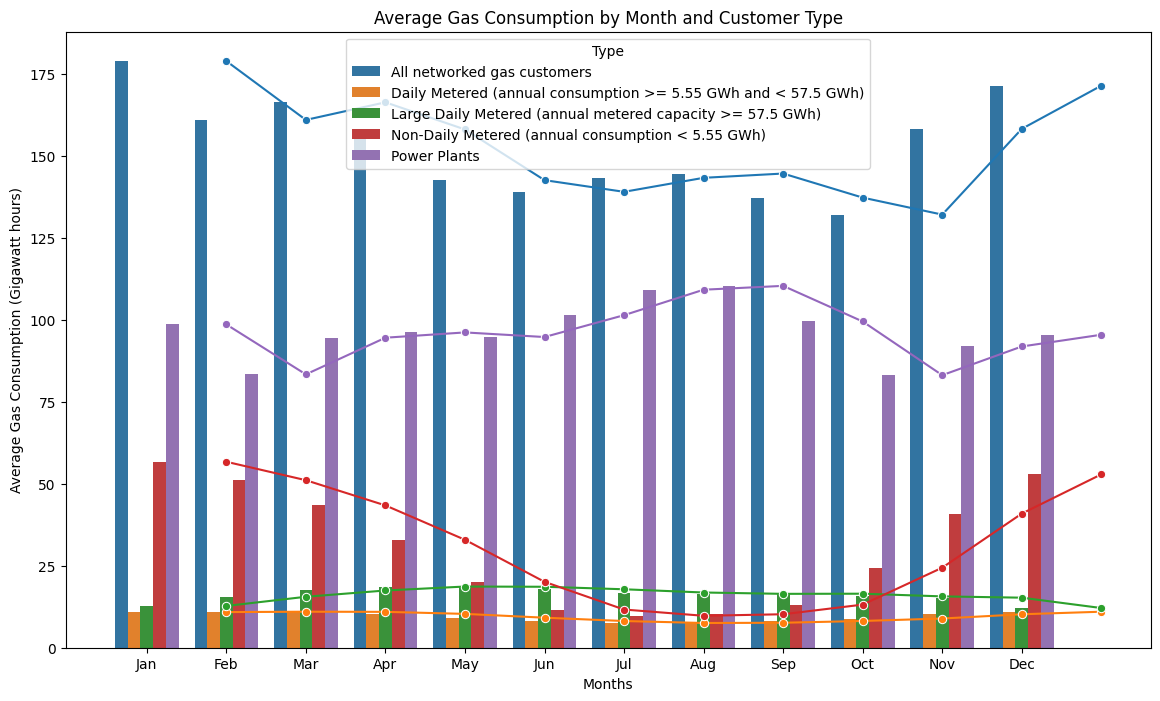

In [129]:
plt.figure(figsize=(14, 8))
sns.barplot(x='Month', y='VALUE', hue="Network Gas Customer Type",data=monthly_avg)
sns.lineplot(x='Month', y='VALUE', hue="Network Gas Customer Type", data=monthly_avg, marker='o',legend=False)
plt.title('Average Gas Consumption by Month and Customer Type')
plt.xlabel('Months')
plt.ylabel('Average Gas Consumption (Gigawatt hours)')
plt.xticks(ticks=range(12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.legend(title='Type')
plt.show()

## As you can see ,every type of customer has different distribution so every types need seprate model.

In [130]:
df = df[df["Network Gas Customer Type"]=="Non-Daily Metered (annual consumption < 5.55 GWh)"]

In [131]:
# Network Gas Customer Type
df.drop(columns="Network Gas Customer Type",inplace=True)

In [132]:
monthly_avg = df.groupby(['Month']).agg({'VALUE': 'mean'}).reset_index()

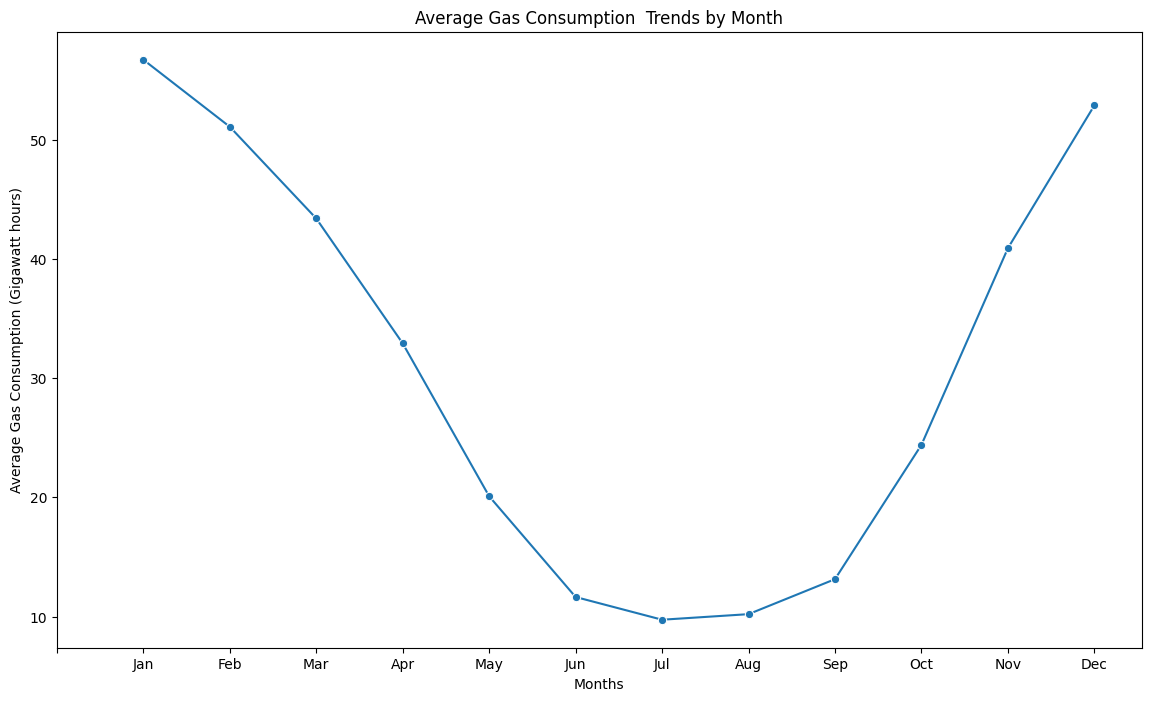

In [133]:

plt.figure(figsize=(14, 8))
# sns.barplot(x='Month', y='VALUE',data=monthly_avg)
sns.lineplot(x='Month', y='VALUE', data=monthly_avg, marker='o',legend=False)
plt.title('Average Gas Consumption  Trends by Month')
plt.xlabel('Months')
plt.ylabel('Average Gas Consumption (Gigawatt hours)')
plt.xticks(ticks=range(13), labels=['','Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()

In [134]:
df.isna().sum()

Statistic Label    0
C04132V04898       0
VALUE              0
Date               0
Month              0
Year               0
day                0
day_of_week        0
wom                0
dtype: int64

In [135]:
df.head()

,Statistic Label,C04132V04898,VALUE,Date,Month,Year,day,day_of_week,wom
0,Networked Gas Daily Consumption,20,61.593662,2021-01-01,1,2021,1,Friday,1
5,Networked Gas Daily Consumption,20,64.817927,2021-01-02,1,2021,2,Saturday,1
10,Networked Gas Daily Consumption,20,65.084971,2021-01-03,1,2021,3,Sunday,1
15,Networked Gas Daily Consumption,20,73.712590,2021-01-04,1,2021,4,Monday,1
20,Networked Gas Daily Consumption,20,72.342131,2021-01-05,1,2021,5,Tuesday,1


In [136]:
pd.date_range(df.Date.min(), df.Date.max(),freq='D').difference(df.Date)

DatetimeIndex([], dtype='datetime64[ns]', freq='D')

In [137]:
df["VALUE"].describe()

count    911.000000
mean      31.554663
std       18.650078
min        6.644515
25%       12.800726
50%       28.907803
75%       47.602614
max       84.321606
Name: VALUE, dtype: float64

# does it has outliers?

In [138]:
df.shape

(911, 9)

Text(0.5, 0, 'Gass Consumption (Gigawatt hours)')

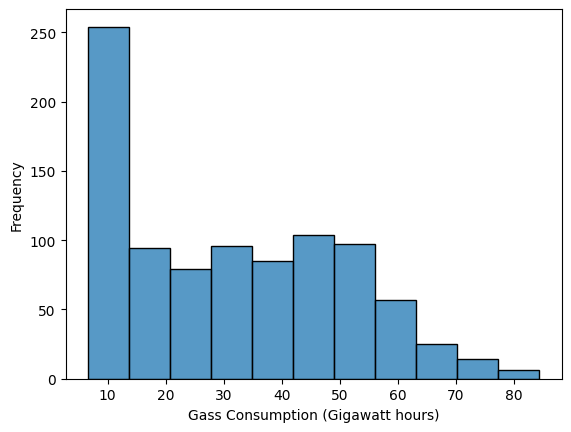

In [139]:
sns.histplot(x=df.VALUE)
plt.ylabel("Frequency")
plt.xlabel("Gass Consumption (Gigawatt hours)")

In [140]:
df.head()

,Statistic Label,C04132V04898,VALUE,Date,Month,Year,day,day_of_week,wom
0,Networked Gas Daily Consumption,20,61.593662,2021-01-01,1,2021,1,Friday,1
5,Networked Gas Daily Consumption,20,64.817927,2021-01-02,1,2021,2,Saturday,1
10,Networked Gas Daily Consumption,20,65.084971,2021-01-03,1,2021,3,Sunday,1
15,Networked Gas Daily Consumption,20,73.712590,2021-01-04,1,2021,4,Monday,1
20,Networked Gas Daily Consumption,20,72.342131,2021-01-05,1,2021,5,Tuesday,1


In [141]:
weekly_avg = df.groupby(['Month','wom']).agg({'VALUE': 'mean'}).reset_index()
# weekly_avg["monthly_weekely"] = weekly_avg["Month"].astype(str)+","+weekly_avg["wom"].astype(str)
weekly_avg.head()

,Month,wom,VALUE
0,1,1,57.137004
1,1,2,57.232569
2,1,3,59.598330
3,1,4,54.839783
4,1,5,52.001380


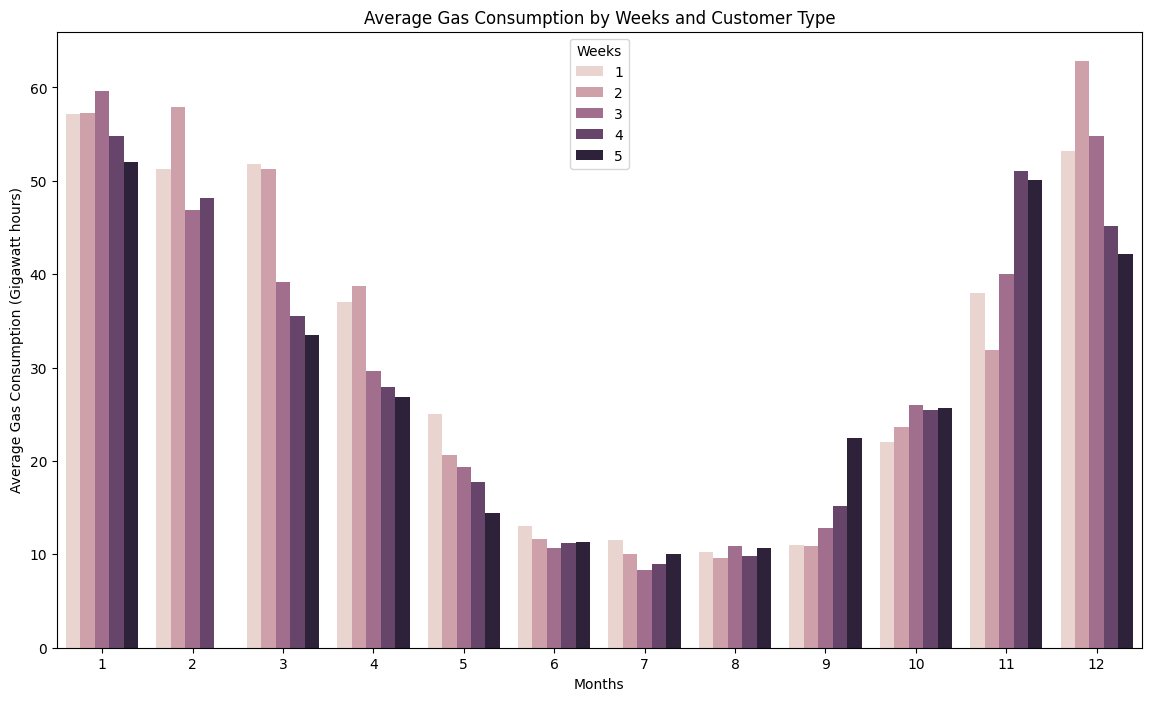

In [142]:
plt.figure(figsize=(14, 8))
sns.barplot(y='VALUE', x="Month",data = weekly_avg,hue="wom")
# sns.lineplot(x='Month', y='VALUE', hue="wom", data=weekly_avg, marker='o',legend=False)
plt.title('Average Gas Consumption by Weeks and Customer Type')
plt.xlabel('Months')
plt.ylabel('Average Gas Consumption (Gigawatt hours)')
plt.legend(title='Weeks')
plt.show()

In [143]:
monthly_avg_per_year = df.groupby(['Year','Month']).agg({'VALUE': 'mean'}).reset_index()

In [144]:
monthly_avg_per_year["monthly_time"] = monthly_avg_per_year["Year"].astype(str)+","+ monthly_avg_per_year["Month"].astype(str)

In [145]:
monthly_avg_per_year.head()

,Year,Month,VALUE,monthly_time
0,2021,1,63.148424,"2021,1"
1,2021,2,56.737020,"2021,2"
2,2021,3,44.734622,"2021,3"
3,2021,4,36.386809,"2021,4"
4,2021,5,27.282247,"2021,5"


C:\Users\OTS\AppData\Local\Temp\ipykernel_19288\2269918004.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Months')


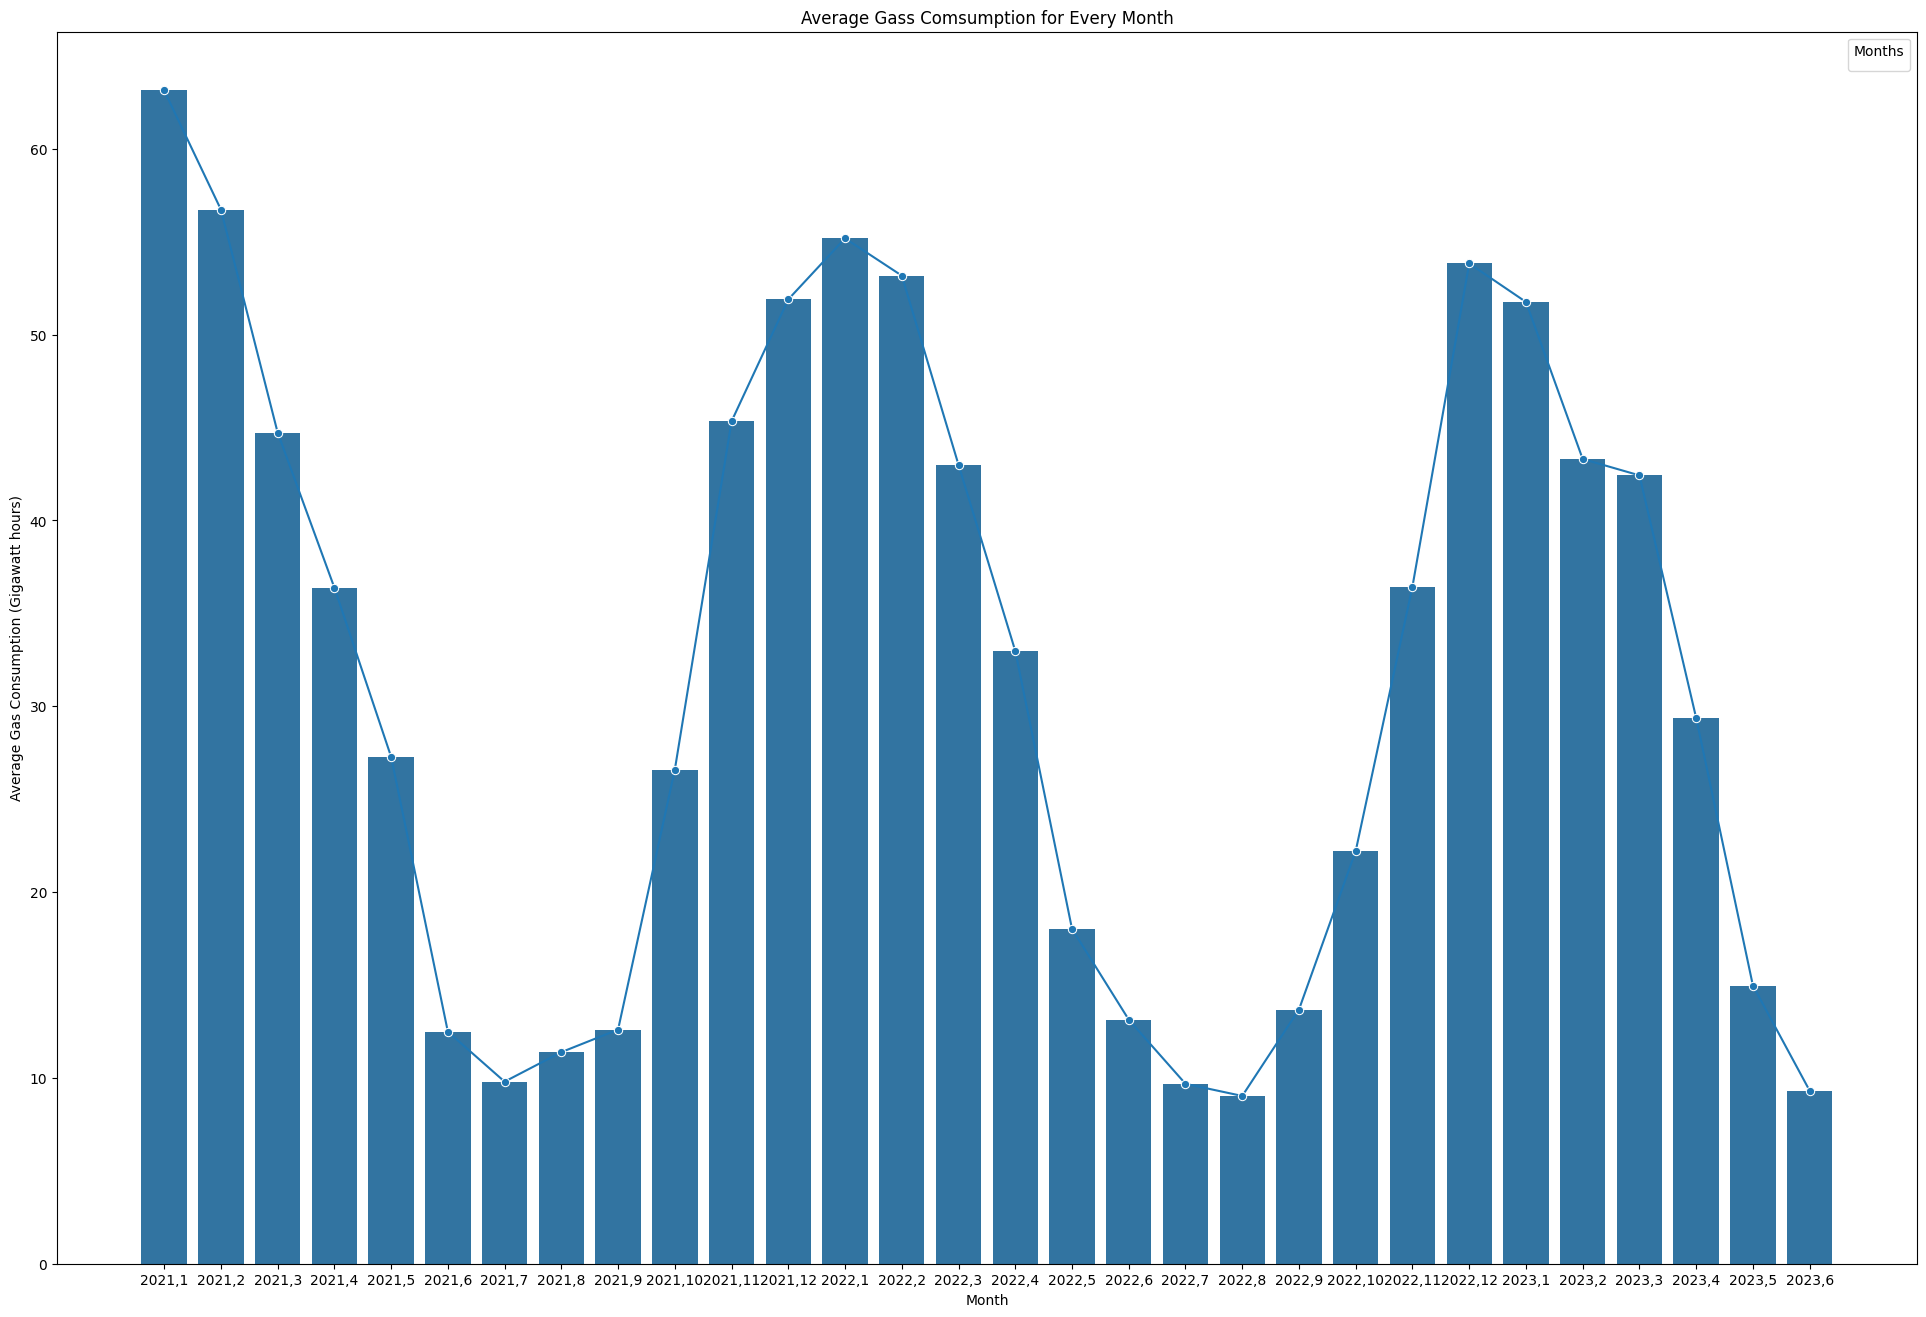

In [146]:
plt.figure(figsize=(24, 16))
labels=monthly_avg_per_year.monthly_time.tolist()
sns.barplot(x='monthly_time', y='VALUE', data=monthly_avg_per_year)
sns.lineplot(x='monthly_time', y='VALUE', data=monthly_avg_per_year, marker='o')
plt.title('Average Gass Comsumption for Every Month')
plt.xlabel('Month')
plt.ylabel('Average Gas Consumption (Gigawatt hours)')
plt.legend(title='Months')

# Show the plot
plt.show()

In [147]:
df.head()

,Statistic Label,C04132V04898,VALUE,Date,Month,Year,day,day_of_week,wom
0,Networked Gas Daily Consumption,20,61.593662,2021-01-01,1,2021,1,Friday,1
5,Networked Gas Daily Consumption,20,64.817927,2021-01-02,1,2021,2,Saturday,1
10,Networked Gas Daily Consumption,20,65.084971,2021-01-03,1,2021,3,Sunday,1
15,Networked Gas Daily Consumption,20,73.712590,2021-01-04,1,2021,4,Monday,1
20,Networked Gas Daily Consumption,20,72.342131,2021-01-05,1,2021,5,Tuesday,1


In [148]:
week_days_average = df.groupby(["Month","day_of_week"]).agg({'VALUE': 'mean'}).reset_index()
week_days_average.head()

,Month,day_of_week,VALUE
0,1,Friday,60.170784
1,1,Monday,58.877050
2,1,Saturday,52.894712
3,1,Sunday,52.442542
4,1,Thursday,58.423354


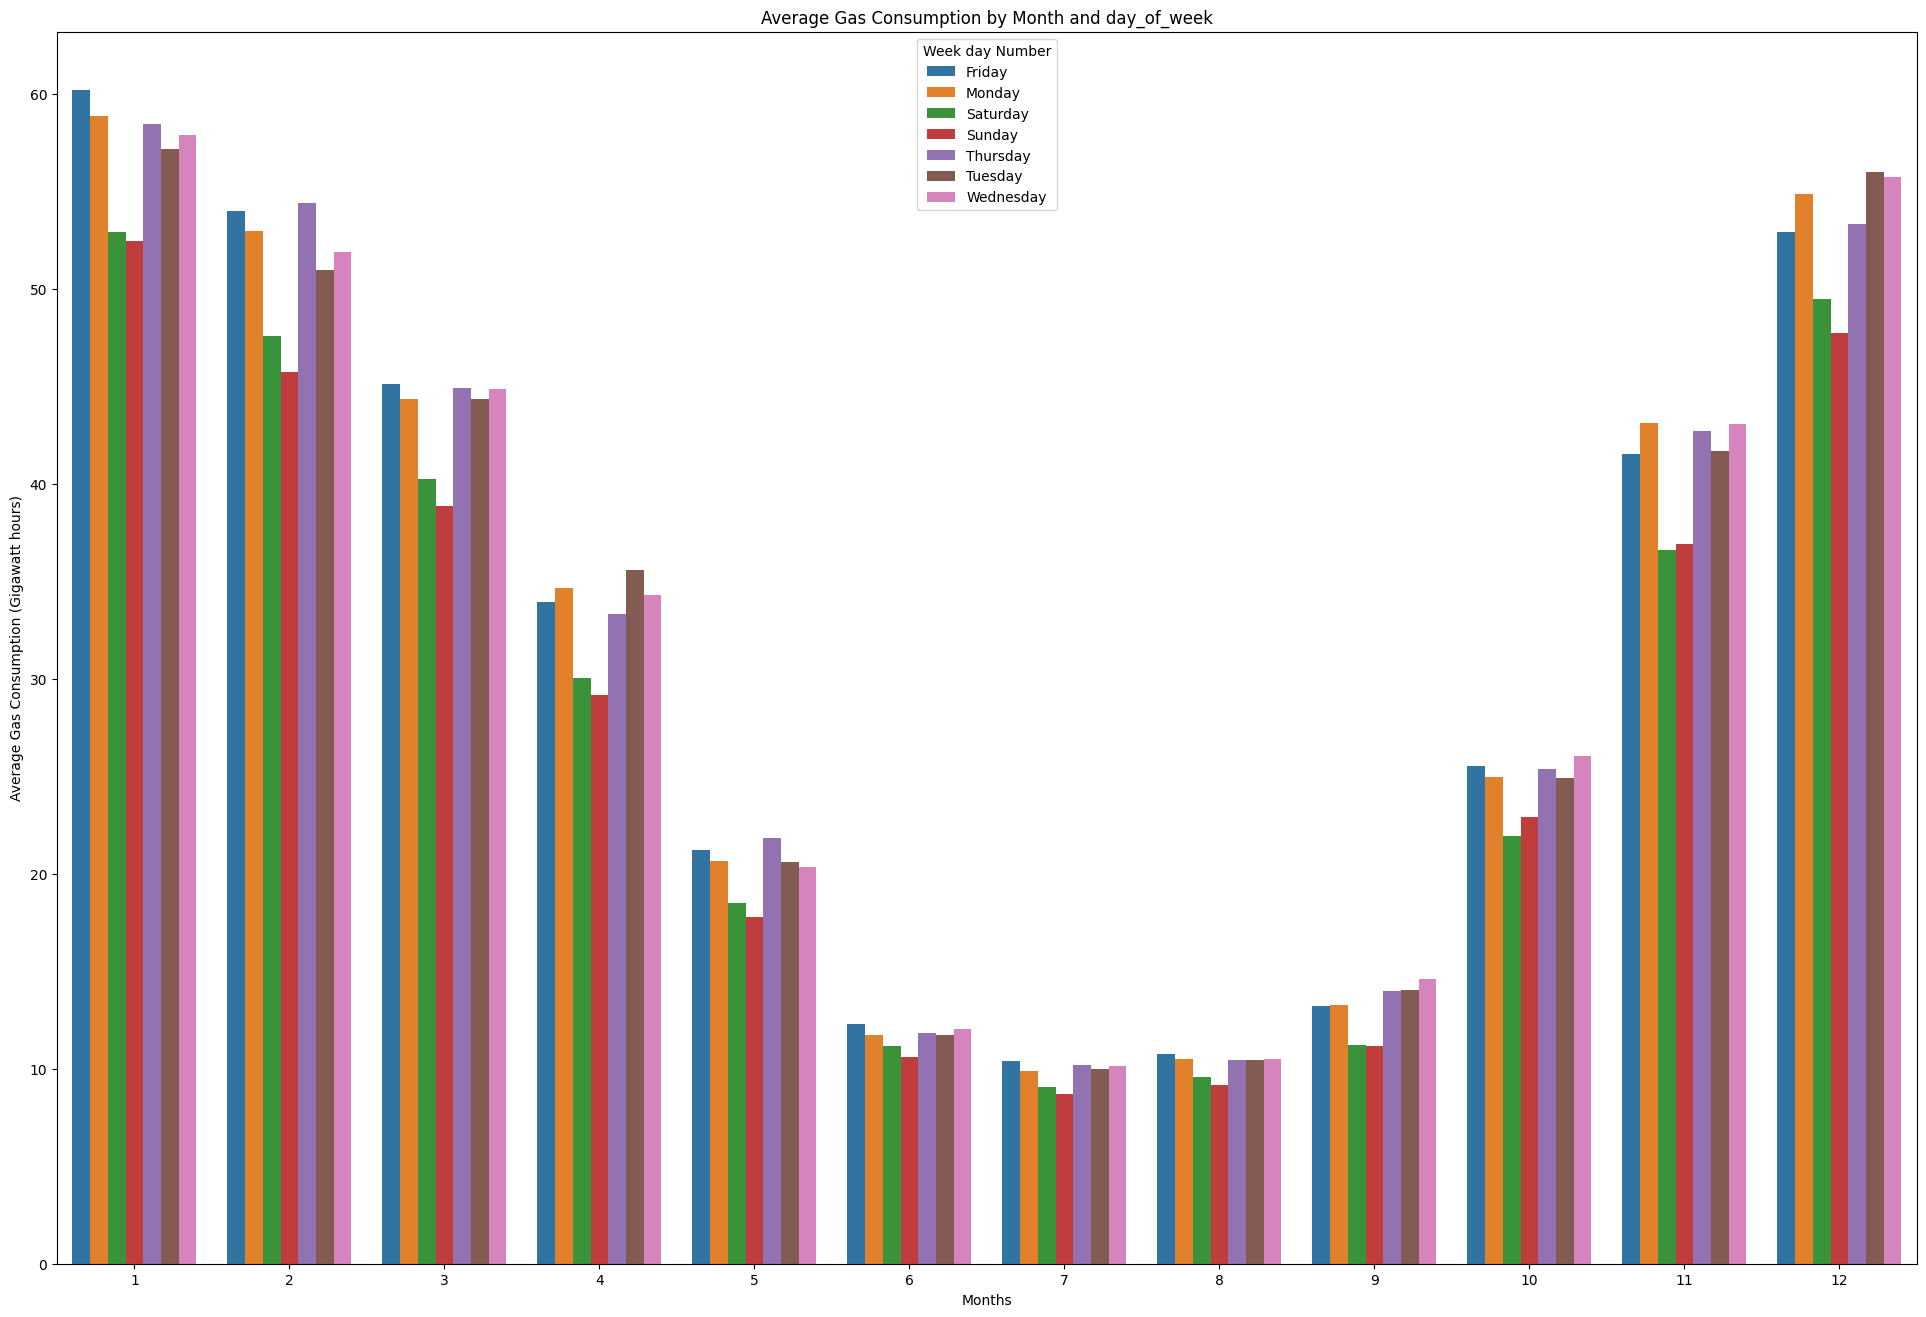

In [149]:
plt.figure(figsize=(24, 16))
sns.barplot(x='Month', y='VALUE', hue="day_of_week",data=week_days_average)
plt.title('Average Gas Consumption by Month and day_of_week')
plt.xlabel('Months')
plt.ylabel('Average Gas Consumption (Gigawatt hours)')
plt.legend(title='Week day Number')
plt.show()

## As we know that this Gass consumption is trongly dependent on weather becuase it is consumed more in cold months.
### So we planned to use Weather Data along this consumption data.

<!-- Station Name: MALIN HEAD
Station Height: 20 M 
Latitude:55.372  ,Longitude: -7.339


date:   -  00 to 00 utc
rain:   -  Precipitation Amount (mm)
maxtp:  -  Maximum Air Temperature (C)	  
mintp:  -  Minimum  Air Temperature (C)
gmin:   -  09utc Grass Minimum Temperature (C)
soil:   -  Mean 10cm Soil Temperature (C)
wdsp:   -  Mean Wind Speed (knot)
hm:     -  Highest ten minute mean wind speed (knot)		                 
ddhm:   -  Wind Direction at max 10 min. mean (deg)                  
hg:     -  Highest Gust (knot)
cbl:    -  Mean CBL Pressure (hpa)
sun:    -  Sunshine duration (hours)
pe:     -  Potential Evapotranspiration (mm)				
evap:   -  Evaporation (mm)						
smd_wd: -  Soil Moisture Deficits(mm) well drained		
smd_md: -  Soil Moisture Deficits(mm) moderately drained	
smd_pd: -  Soil Moisture Deficits(mm) poorly drained 	
ind:    -  Indicator (i) -->

In [150]:
weather_df= pd.read_csv("gas_consumption/weather_data.csv")

In [151]:
weather_df.rename(columns={'date': 'Date'}, inplace=True)

In [152]:
weather_df.head()

,Date,ind,maxtp,ind.1,mintp,igmin,gmin,ind.2,rain,cbl,...,ind.5,hg,sun,glorad,soil,pe,evap,smd_wd,smd_md,smd_pd
0,01-may-1955,0,9.4,0,6.9,0,3.8,0,7.4,996.2,...,2,48,,,,1.0,1.9,,,
1,02-may-1955,0,11.2,0,5.7,0,5.9,3,0.0,997.1,...,0,31,,,12.300,1.9,3.6,,,
2,03-may-1955,0,13.1,0,4.3,0,0.6,0,6.6,989.6,...,0,48,,,9.200,1.4,2.4,,,
3,04-may-1955,0,12.8,0,7.8,0,6.1,0,4.4,978.3,...,0,41,,,9.625,2.0,3.6,,,
4,05-may-1955,0,13.2,0,8.1,0,6.6,0,2.7,990.3,...,0,34,,,10.775,2.0,3.4,,,


In [153]:
weather_df.isna().sum()

Date      0
ind       0
maxtp     0
ind.1     0
mintp     0
igmin     0
gmin      0
ind.2     0
rain      0
cbl       0
wdsp      0
ind.3     0
hm        0
ind.4     0
ddhm      0
ind.5     0
hg        0
sun       0
glorad    0
soil      0
pe        0
evap      0
smd_wd    0
smd_md    0
smd_pd    0
dtype: int64

In [154]:
weather_df.dtypes

Date       object
ind         int64
maxtp     float64
ind.1       int64
mintp     float64
igmin      object
gmin       object
ind.2       int64
rain      float64
cbl       float64
wdsp       object
ind.3       int64
hm         object
ind.4       int64
ddhm       object
ind.5       int64
hg         object
sun        object
glorad     object
soil       object
pe         object
evap       object
smd_wd     object
smd_md     object
smd_pd     object
dtype: object

In [155]:
weather_df.head()

,Date,ind,maxtp,ind.1,mintp,igmin,gmin,ind.2,rain,cbl,...,ind.5,hg,sun,glorad,soil,pe,evap,smd_wd,smd_md,smd_pd
0,01-may-1955,0,9.4,0,6.9,0,3.8,0,7.4,996.2,...,2,48,,,,1.0,1.9,,,
1,02-may-1955,0,11.2,0,5.7,0,5.9,3,0.0,997.1,...,0,31,,,12.300,1.9,3.6,,,
2,03-may-1955,0,13.1,0,4.3,0,0.6,0,6.6,989.6,...,0,48,,,9.200,1.4,2.4,,,
3,04-may-1955,0,12.8,0,7.8,0,6.1,0,4.4,978.3,...,0,41,,,9.625,2.0,3.6,,,
4,05-may-1955,0,13.2,0,8.1,0,6.6,0,2.7,990.3,...,0,34,,,10.775,2.0,3.4,,,


In [156]:
weather_df = weather_df[["Date","maxtp","mintp","rain","sun"]]

In [157]:
df["Date"] = pd.to_datetime(df["Date"])
weather_df["Date"] = pd.to_datetime(weather_df["Date"])

C:\Users\OTS\AppData\Local\Temp\ipykernel_19288\2199522185.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  weather_df["Date"] = pd.to_datetime(weather_df["Date"])


In [158]:
df.dtypes

Statistic Label            object
C04132V04898               object
VALUE                     float64
Date               datetime64[ns]
Month                       int32
Year                        int32
day                         int32
day_of_week                object
wom                         int64
dtype: object

In [159]:
full_df = pd.merge(df, weather_df, on='Date', how='left')

In [160]:
full_df.isna().sum()

Statistic Label    0
C04132V04898       0
VALUE              0
Date               0
Month              0
Year               0
day                0
day_of_week        0
wom                0
maxtp              0
mintp              0
rain               0
sun                0
dtype: int64

In [161]:
full_df.dtypes

Statistic Label            object
C04132V04898               object
VALUE                     float64
Date               datetime64[ns]
Month                       int32
Year                        int32
day                         int32
day_of_week                object
wom                         int64
maxtp                     float64
mintp                     float64
rain                      float64
sun                        object
dtype: object

In [162]:
full_df.corr(numeric_only=True)

,VALUE,Month,Year,day,wom,maxtp,mintp,rain
VALUE,1.000000,-0.330648,-0.040198,-0.096552,-0.097328,-0.877636,-0.831615,0.106719
Month,-0.330648,1.000000,-0.283656,0.012266,0.014174,0.333733,0.379266,0.036386
Year,-0.040198,-0.283656,1.000000,-0.004305,-0.004815,-0.001469,-0.051242,-0.025651
day,-0.096552,0.012266,-0.004305,1.000000,0.973923,0.073628,0.067475,-0.027742
wom,-0.097328,0.014174,-0.004815,0.973923,1.000000,0.076713,0.071289,-0.024647
maxtp,-0.877636,0.333733,-0.001469,0.073628,0.076713,1.000000,0.862837,-0.057712
mintp,-0.831615,0.379266,-0.051242,0.067475,0.071289,0.862837,1.000000,-0.042662
rain,0.106719,0.036386,-0.025651,-0.027742,-0.024647,-0.057712,-0.042662,1.000000


In [163]:
full_df.head()

,Statistic Label,C04132V04898,VALUE,Date,Month,Year,day,day_of_week,wom,maxtp,mintp,rain,sun
0,Networked Gas Daily Consumption,20,61.593662,2021-01-01,1,2021,1,Friday,1,7.2,3.2,1.6,1.1
1,Networked Gas Daily Consumption,20,64.817927,2021-01-02,1,2021,2,Saturday,1,6.3,4.2,1.7,2.1
2,Networked Gas Daily Consumption,20,65.084971,2021-01-03,1,2021,3,Sunday,1,6.4,5.0,0.0,2.7
3,Networked Gas Daily Consumption,20,73.712590,2021-01-04,1,2021,4,Monday,1,6.1,4.9,0.0,2.0
4,Networked Gas Daily Consumption,20,72.342131,2021-01-05,1,2021,5,Tuesday,1,6.5,4.7,0.0,5.3


In [164]:
df_encoded = pd.get_dummies(full_df, columns=['Month', 'day_of_week','wom'])

In [165]:
df_encoded.columns

Index(['Statistic Label', 'C04132V04898', 'VALUE', 'Date', 'Year', 'day',
       'maxtp', 'mintp', 'rain', 'sun', 'Month_1', 'Month_2', 'Month_3',
       'Month_4', 'Month_5', 'Month_6', 'Month_7', 'Month_8', 'Month_9',
       'Month_10', 'Month_11', 'Month_12', 'day_of_week_Friday',
       'day_of_week_Monday', 'day_of_week_Saturday', 'day_of_week_Sunday',
       'day_of_week_Thursday', 'day_of_week_Tuesday', 'day_of_week_Wednesday',
       'wom_1', 'wom_2', 'wom_3', 'wom_4', 'wom_5'],
      dtype='object')

In [166]:
df_encoded.drop(columns=['day','Year','Statistic Label','C04132V04898','Statistic Label'],inplace=True)

In [167]:
df_encoded = df_encoded.sort_values('Date')

In [168]:
df_encoded.head()

,VALUE,Date,maxtp,mintp,rain,sun,Month_1,Month_2,Month_3,Month_4,...,day_of_week_Saturday,day_of_week_Sunday,day_of_week_Thursday,day_of_week_Tuesday,day_of_week_Wednesday,wom_1,wom_2,wom_3,wom_4,wom_5
0,61.593662,2021-01-01,7.2,3.2,1.6,1.1,True,False,False,False,...,False,False,False,False,False,True,False,False,False,False
1,64.817927,2021-01-02,6.3,4.2,1.7,2.1,True,False,False,False,...,True,False,False,False,False,True,False,False,False,False
2,65.084971,2021-01-03,6.4,5.0,0.0,2.7,True,False,False,False,...,False,True,False,False,False,True,False,False,False,False
3,73.712590,2021-01-04,6.1,4.9,0.0,2.0,True,False,False,False,...,False,False,False,False,False,True,False,False,False,False
4,72.342131,2021-01-05,6.5,4.7,0.0,5.3,True,False,False,False,...,False,False,False,True,False,True,False,False,False,False


In [169]:
train_size = int(len(df_encoded) * 0.8)
train_df, test_df = df_encoded[:train_size], df_encoded[train_size:]

In [170]:
train_date = train_df["Date"]
train_df.drop(columns="Date",inplace=True)
test_date = test_df["Date"]
test_df.drop(columns="Date",inplace=True)

C:\Users\OTS\AppData\Local\Temp\ipykernel_19288\252422083.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df.drop(columns="Date",inplace=True)
C:\Users\OTS\AppData\Local\Temp\ipykernel_19288\252422083.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df.drop(columns="Date",inplace=True)


In [171]:
test_date.head()

728   2022-12-30
729   2022-12-31
730   2023-01-01
731   2023-01-02
732   2023-01-03
Name: Date, dtype: datetime64[ns]

In [172]:
train_df.head()

,VALUE,maxtp,mintp,rain,sun,Month_1,Month_2,Month_3,Month_4,Month_5,...,day_of_week_Saturday,day_of_week_Sunday,day_of_week_Thursday,day_of_week_Tuesday,day_of_week_Wednesday,wom_1,wom_2,wom_3,wom_4,wom_5
0,61.593662,7.2,3.2,1.6,1.1,True,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
1,64.817927,6.3,4.2,1.7,2.1,True,False,False,False,False,...,True,False,False,False,False,True,False,False,False,False
2,65.084971,6.4,5.0,0.0,2.7,True,False,False,False,False,...,False,True,False,False,False,True,False,False,False,False
3,73.712590,6.1,4.9,0.0,2.0,True,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
4,72.342131,6.5,4.7,0.0,5.3,True,False,False,False,False,...,False,False,False,True,False,True,False,False,False,False


In [173]:
x_train = train_df.drop(columns="VALUE")
y_train = train_df["VALUE"]
x_test = test_df.drop(columns="VALUE")
y_test = test_df["VALUE"]

In [174]:
x_test.head()

,maxtp,mintp,rain,sun,Month_1,Month_2,Month_3,Month_4,Month_5,Month_6,...,day_of_week_Saturday,day_of_week_Sunday,day_of_week_Thursday,day_of_week_Tuesday,day_of_week_Wednesday,wom_1,wom_2,wom_3,wom_4,wom_5
728,8.7,3.6,3.9,1.3,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
729,7.2,1.7,3.1,1.3,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,True
730,6.6,4.6,0.1,1.3,True,False,False,False,False,False,...,False,True,False,False,False,True,False,False,False,False
731,5.3,1.2,0.2,4.3,True,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
732,10.2,4.5,9.2,0.0,True,False,False,False,False,False,...,False,False,False,True,False,True,False,False,False,False


In [175]:
x_train.head()

,maxtp,mintp,rain,sun,Month_1,Month_2,Month_3,Month_4,Month_5,Month_6,...,day_of_week_Saturday,day_of_week_Sunday,day_of_week_Thursday,day_of_week_Tuesday,day_of_week_Wednesday,wom_1,wom_2,wom_3,wom_4,wom_5
0,7.2,3.2,1.6,1.1,True,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
1,6.3,4.2,1.7,2.1,True,False,False,False,False,False,...,True,False,False,False,False,True,False,False,False,False
2,6.4,5.0,0.0,2.7,True,False,False,False,False,False,...,False,True,False,False,False,True,False,False,False,False
3,6.1,4.9,0.0,2.0,True,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
4,6.5,4.7,0.0,5.3,True,False,False,False,False,False,...,False,False,False,True,False,True,False,False,False,False


In [176]:
estimators = [
    ('lr', linear_model.LinearRegression()),
    ('RANSACRegressor', linear_model.RANSACRegressor()),
    ('rfr', RandomForestRegressor()),
    ('gbr', GradientBoostingRegressor(random_state=123)),
    ('Ridge Regression', linear_model.RidgeCV(alphas=[0.1, 1.0, 10.0])),
    ('svr', SVR(kernel='rbf', C=1.0, epsilon=0.1))
]

reg = StackingRegressor(
    estimators=estimators,
    cv=10,
    final_estimator=GradientBoostingRegressor(max_depth=56, n_estimators=15, random_state=123)
)


In [177]:
stackedR = reg.fit(x_train, y_train)

In [178]:
y_pred = stackedR.predict(x_test)

stackedR

StackingRegressor(cv=10,
                  estimators=[('lr', LinearRegression()),
                              ('RANSACRegressor', RANSACRegressor()),
                              ('rfr', RandomForestRegressor()),
                              ('gbr',
                               GradientBoostingRegressor(random_state=123)),
                              ('Ridge Regression',
                               RidgeCV(alphas=[0.1, 1.0, 10.0])),
                              ('svr', SVR())],
                  final_estimator=GradientBoostingRegressor(max_depth=56,
                                                            n_estimators=15,
                                                            random_state=123))

In [179]:
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
rmse = root_mean_squared_error(y_test, y_pred)
print(f"Root Mean Squared Error: {rmse}")

Mean Squared Error: 42.58149570275807
Root Mean Squared Error: 6.525449846773636


C:\Users\OTS\AppData\Local\Temp\ipykernel_19288\276904937.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  sns.barplot(importances).set_xticklabels(estimators)


[Text(0, 0, 'lr'),
 Text(1, 0, 'RANSACRegressor'),
 Text(2, 0, 'rfr'),
 Text(3, 0, 'gbr'),
 Text(4, 0, 'Ridge Regression'),
 Text(5, 0, 'svr')]

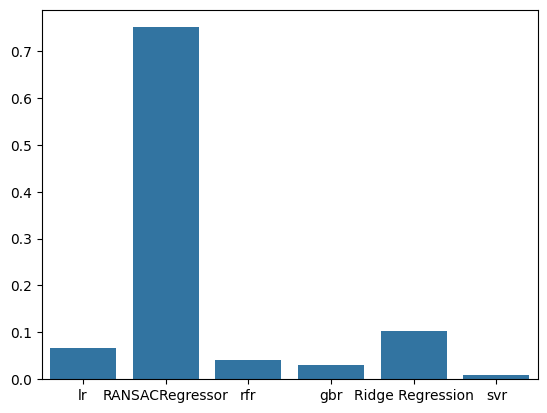

In [180]:
importances = stackedR.final_estimator_.feature_importances_
estimators = [estimator for estimator in stackedR.named_estimators_]

sns.barplot(importances).set_xticklabels(estimators)

In [181]:
model = linear_model.RANSACRegressor()
model.fit(x_train, y_train)

RANSACRegressor()

In [182]:
y_pred = model.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 45.564582763339835


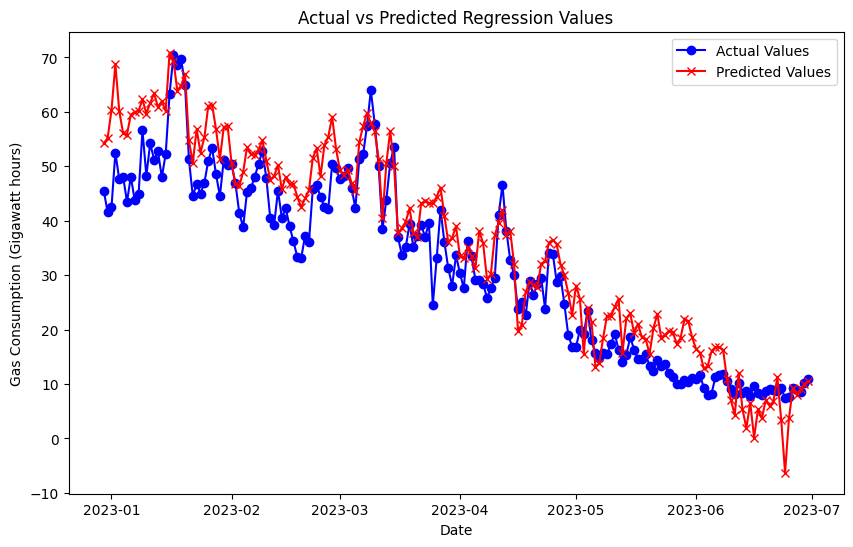

In [183]:
plt.figure(figsize=(10, 6))
plt.plot(test_date, y_test, label='Actual Values', marker='o', color='blue')
plt.plot(test_date,y_pred, label='Predicted Values', marker='x', color='red')
plt.xlabel('Date')
plt.ylabel('Gas Consumption (Gigawatt hours)')
plt.title('Actual vs Predicted Regression Values')
plt.legend()

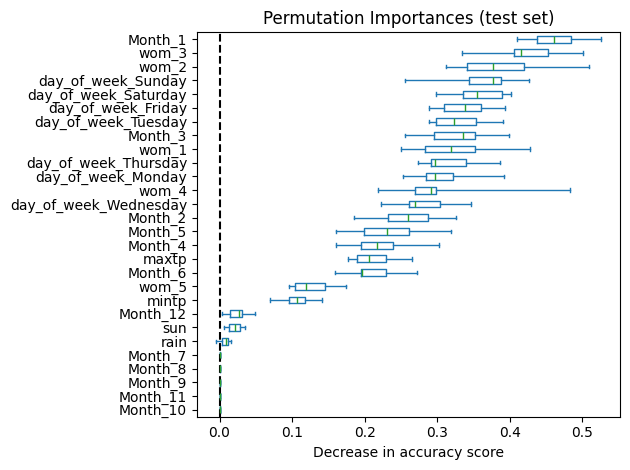

In [184]:
result_stack = permutation_importance(
    reg, x_test, y_test, n_repeats=10, random_state=123, n_jobs=2
)

sorted_importances_idx = result_stack.importances_mean.argsort()
importances = pd.DataFrame(
    result_stack.importances[sorted_importances_idx].T,
    columns=x_test.columns[sorted_importances_idx],
)
ax = importances.plot.box(vert=False, whis=10)
ax.set_title("Permutation Importances (test set)")
ax.axvline(x=0, color="k", linestyle="--")
ax.set_xlabel("Decrease in accuracy score")
ax.figure.tight_layout()

In [185]:
lr_model = linear_model.LinearRegression()
lr_model.fit(x_train, y_train)
y_pred = lr_model.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
rmse = root_mean_squared_error(y_test, y_pred)
print(f"Root Mean Squared Error: {rmse}")
print("R Sqaure :",lr_model.score(x_test, y_test))

Mean Squared Error: 44.31175527843947
Root Mean Squared Error: 6.656707540401596
R Sqaure : 0.8400105749809339


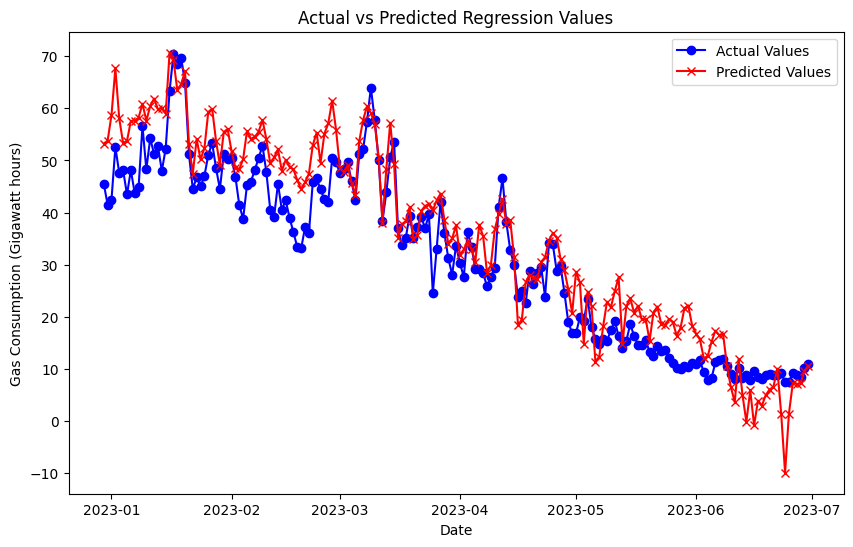

In [186]:
plt.figure(figsize=(10, 6))
plt.plot(test_date, y_test, label='Actual Values', marker='o', color='blue')
plt.plot(test_date,y_pred, label='Predicted Values', marker='x', color='red')
plt.xlabel('Date')
plt.ylabel('Gas Consumption (Gigawatt hours)')
plt.title('Actual vs Predicted Regression Values')
plt.legend()

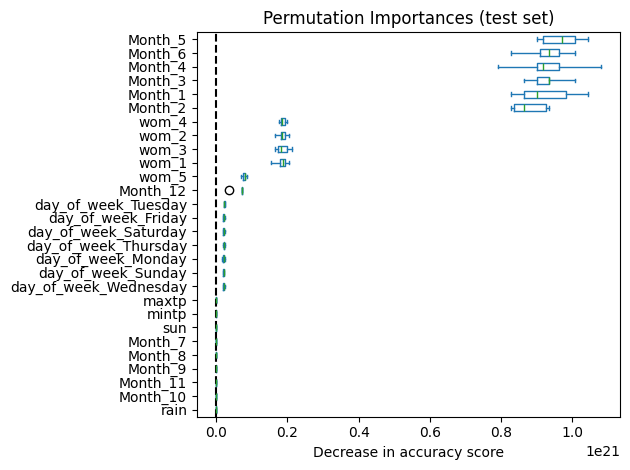

In [187]:
result_stack = permutation_importance(
    lr_model, x_test, y_test, n_repeats=10, random_state=123, n_jobs=2
)

sorted_importances_idx = result_stack.importances_mean.argsort()
importances = pd.DataFrame(
    result_stack.importances[sorted_importances_idx].T,
    columns=x_test.columns[sorted_importances_idx],
)
ax = importances.plot.box(vert=False, whis=10)
ax.set_title("Permutation Importances (test set)")
ax.axvline(x=0, color="k", linestyle="--")
ax.set_xlabel("Decrease in accuracy score")
ax.figure.tight_layout()

In [188]:
gbr_model = GradientBoostingRegressor()

gbr_model.fit(x_train, y_train)
y_pred = gbr_model.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
rmse = root_mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print("R Sqaure :",gbr_model.score(x_test, y_test))


Mean Squared Error: 42.70749041928379
Root Mean Squared Error: 6.535096817896717
R Sqaure : 0.8458028396019541


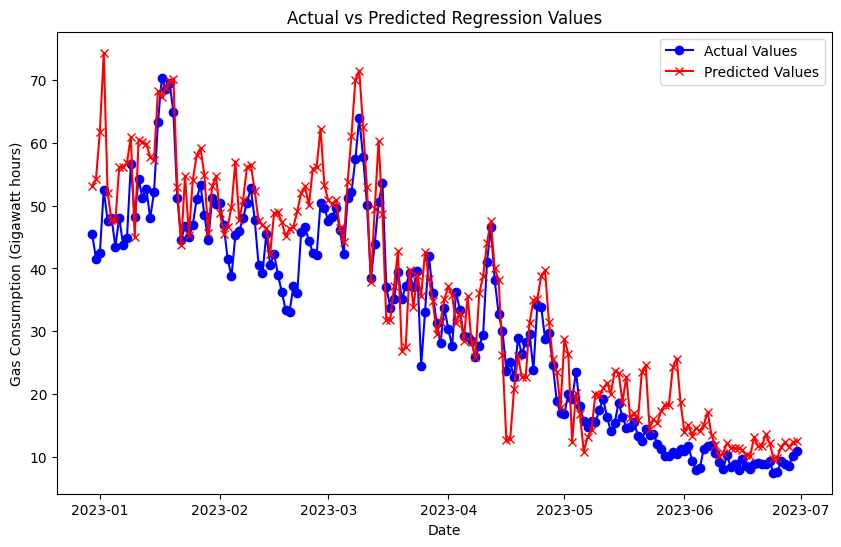

In [189]:
plt.figure(figsize=(10, 6))
plt.plot(test_date, y_test, label='Actual Values', marker='o', color='blue')
plt.plot(test_date,y_pred, label='Predicted Values', marker='x', color='red')
plt.xlabel('Date')
plt.ylabel('Gas Consumption (Gigawatt hours)')
plt.title('Actual vs Predicted Regression Values')
plt.legend()

# model score /adjusted R

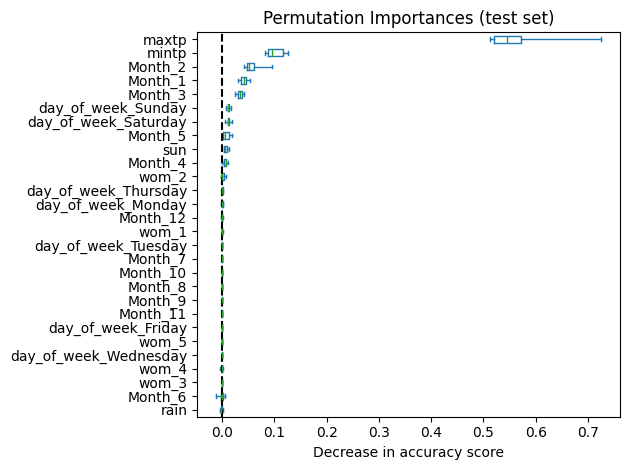

In [190]:
# feature_importance = gbr_model.feature_importances_
result = permutation_importance(
    gbr_model, x_test, y_test, n_repeats=10, random_state=123, n_jobs=2
)

sorted_importances_idx_gbr = result.importances_mean.argsort()
importances = pd.DataFrame(
    result.importances[sorted_importances_idx_gbr].T,
    columns=x_test.columns[sorted_importances_idx_gbr],
)
ax = importances.plot.box(vert=False, whis=10)
ax.set_title("Permutation Importances (test set)")
ax.axvline(x=0, color="k", linestyle="--")
ax.set_xlabel("Decrease in accuracy score")
ax.figure.tight_layout()

In [191]:
top_features = x_test.columns[sorted_importances_idx_gbr][-15:]
gbr_model = GradientBoostingRegressor()

gbr_model.fit(x_train[top_features], y_train)
y_pred = gbr_model.predict(x_test[top_features])
mse = mean_squared_error(y_test, y_pred)
rmse = root_mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print("R Sqaure :",gbr_model.score(x_test[top_features], y_test))


Mean Squared Error: 41.974919177442004
Root Mean Squared Error: 6.478805381969889
R Sqaure : 0.8484478183673247


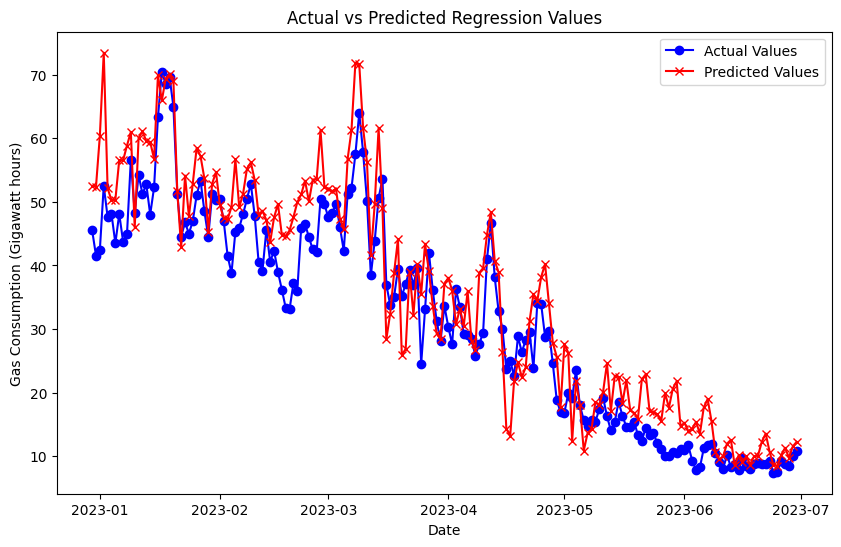

In [207]:
plt.figure(figsize=(10, 6))
plt.plot(test_date, y_test, label='Actual Values', marker='o', color='blue')
plt.plot(test_date,y_pred, label='Predicted Values', marker='x', color='red')
plt.xlabel('Date')
plt.ylabel('Gas Consumption (Gigawatt hours)')
plt.title('Actual vs Predicted Regression Values')
plt.legend()

# This is function to (Hypothesis) test that data is stationary of not ,because Arima Works on stationary data.

In [193]:
def adf_test(series):
    result = adfuller(series)
    print(f"ADF Statistic: {result[0]}")
    print(f"p-value: {result[1]}")
    for key, value in result[4].items():
        print(f"Critical Value {key}: {value}")
    return result[1]  

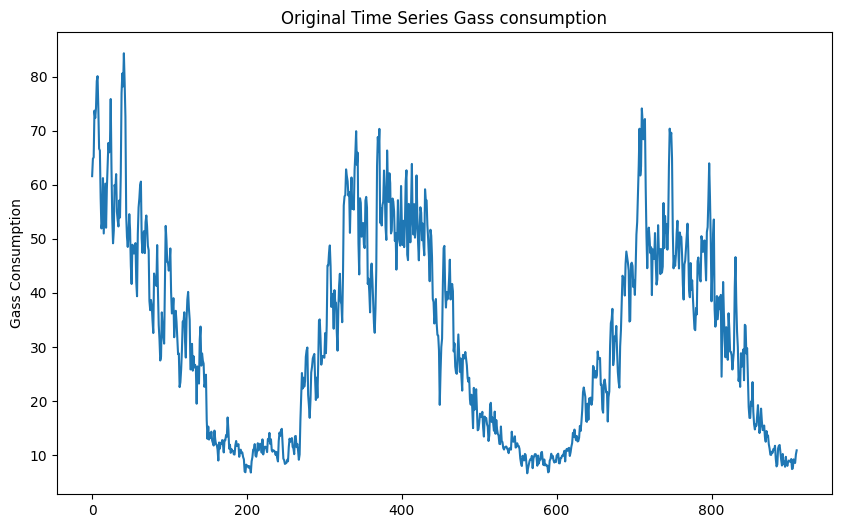

In [194]:
gass_consumption = full_df["VALUE"]
plt.figure(figsize=(10, 6))
gass_consumption.plot(title="Original Time Series Gass consumption",x=test_date)
plt.ylabel("Gass Consumption")
plt.show()

In [195]:
adf_test(gass_consumption.dropna())

ADF Statistic: -2.0436800497793715
p-value: 0.2677552146554242
Critical Value 1%: -3.4377271455534597
Critical Value 5%: -2.864796595407904
Critical Value 10%: -2.5685040379415454


0.2677552146554242

# spectugram for seasons ,and other hyperparamets

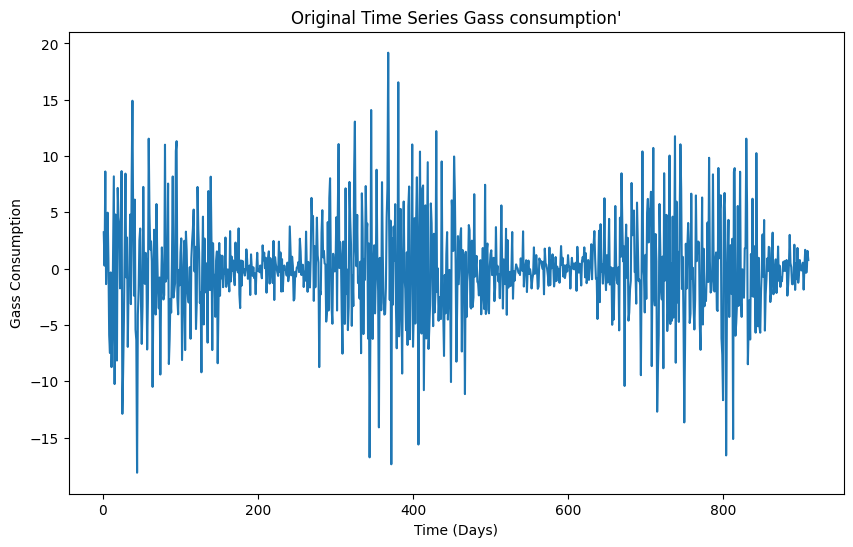

In [196]:
gass_consumption = gass_consumption.diff()
plt.figure(figsize=(10, 6))
gass_consumption.dropna()
gass_consumption.plot(title="Original Time Series Gass consumption'")
plt.xlabel("Time (Days)")
plt.ylabel("Gass Consumption")
plt.show()

In [197]:
model = SARIMAX(train_df['VALUE'], order=(1, 1, 1), seasonal_order=(1, 1, 0, 12)) 
fitted_model = model.fit()

In [198]:
print(fitted_model.summary())

                                      SARIMAX Results                                      
Dep. Variable:                               VALUE   No. Observations:                  728
Model:             SARIMAX(1, 1, 1)x(1, 1, [], 12)   Log Likelihood               -2183.849
Date:                             Wed, 11 Dec 2024   AIC                           4375.697
Time:                                     16:34:42   BIC                           4393.986
Sample:                                          0   HQIC                          4382.760
                                             - 728                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9198      0.015    -63.077      0.000      -0.948      -0.891
ma.L1          0.9999      

In [199]:
len(test_df)

183

In [200]:
from sklearn.metrics import r2_score
forecast = fitted_model.forecast(steps=len(test_df))
mse = mean_squared_error(test_df['VALUE'], forecast)
rmse = root_mean_squared_error(test_df['VALUE'], forecast)
print(f"Mean mean Error (MAE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print("R Sqaure :",r2_score(test_df['VALUE'], forecast))

Mean mean Error (MAE): 86.67310852682826
Root Mean Squared Error (RMSE): 9.309839339474568
R Sqaure : 0.6870631571534822


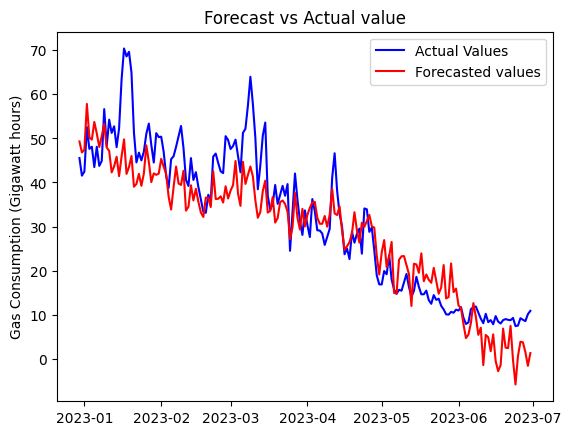

In [208]:
plt.plot(test_date, test_df['VALUE'], label="Actual Values", color="blue")
plt.plot(test_date, forecast, label="Forecasted values", color="red")
plt.legend()
plt.ylabel('Gas Consumption (Gigawatt hours)')
plt.title("Forecast vs Actual value")
plt.show()

In [202]:
top_features = x_test.columns[sorted_importances_idx_gbr][-13:]
stack_top_features = x_test.columns[sorted_importances_idx][-9:]
top_features =list(set(list(top_features)+ list(stack_top_features)))
top_features

['Month_4',
 'sun',
 'day_of_week_Monday',
 'day_of_week_Sunday',
 'Month_6',
 'maxtp',
 'day_of_week_Saturday',
 'Month_3',
 'mintp',
 'Month_5',
 'wom_4',
 'wom_2',
 'wom_3',
 'Month_1',
 'Month_2',
 'day_of_week_Thursday']

## I selected some best feature to train model usign common feature from both stacking model and Gradient Boosting Algorthm,along with some addition features by understanding trend in data.

In [203]:
top_features = ['sun',
 'day_of_week_Sunday',
 'Month_2',
 'day_of_week_Saturday',
 'wom_4',
 'Month_6',
 'maxtp',
 'wom_2',
 'Month_1',
 'Month_7',
 'wom_3',
 'Month_5',
 'Month_3',
 'Month_4',
 'Month_8',
'Month_9']

In [204]:
model = SARIMAX(train_df['VALUE'], 
                exog=train_df[top_features].astype(float), 
                order=(1, 1, 1), 
                seasonal_order=(1, 1, 0, 12)) 

fitted_model = model.fit()

c:\Users\OTS\anaconda3\envs\shoefiter_test\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [205]:
forecast = fitted_model.forecast(steps=len(test_df),exog=test_df[top_features].astype(float))
rmse = root_mean_squared_error(test_df['VALUE'], forecast)
mse =  mean_squared_error(test_df['VALUE'], forecast)
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print("R Sqaure :",r2_score(test_df['VALUE'], forecast))

Mean Squared Error (MSE): 55.53621731214313
Root Mean Squared Error (RMSE): 7.452262563285269
R Sqaure : 0.7994841906019707


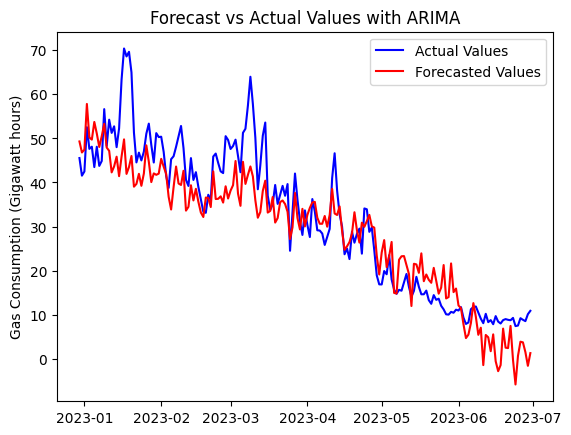

In [209]:
plt.plot(test_date, test_df['VALUE'], label="Actual Values", color="blue")
plt.plot(test_date, forecast, label="Forecasted Values", color="red")
plt.legend()
plt.ylabel('Gas Consumption (Gigawatt hours)')
plt.title("Forecast vs Actual Values with ARIMA")
plt.show()